<h1>Machine learning - HW2</h1>
<h1>Navid Ashraf</h1>

<h2>Libraries:</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

<h2>Question 1</h2>
<p>We want to generate sample data such as slide images based on sin function; Then we are going to approximate it using regression method.</p>
<p>Solve the fitting(regression) problem for the simulated data ($t=sin2\pi x + \epsilon$, $0\leq x \leq 1$,$N=15$,$\epsilon \sim N(0,s^2)$ and present the results. Write the programs in a way that the sin function and its parameters can be easily changed.</p>
<p>The mean squared error(MSE) should be the criterion for error measurement. Investigate the effect of changes in "s" on the train and test error.</p>
<p>Considering the polynomial regression model of order m, illustrate the phenomena of overfitting and underfitting on a graph with respect to the number of samples(N).</p>
<p>The horizontal axis of this graph should represent the number of samples, and the vertical axis should represent the train and test errors.</p>
<p>Provide an analysis of your results.</p>

<h2>Answer</h2>

<p>base case($N=15$, $s^2 = 0.1$):</p>

Train Mean squared error: 0.01
Test Mean squared error: 0.01


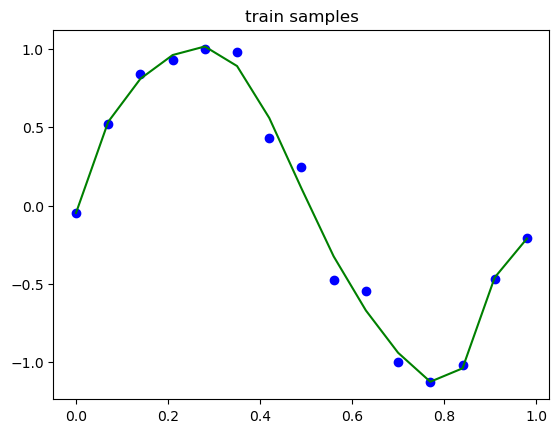

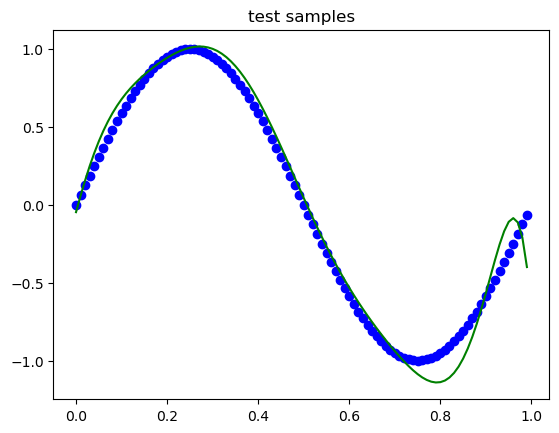

In [7]:
#Data Generation
def f(t):
    return np.sin(2*np.pi*t)

x1 = np.arange(0.0, 1.0, 0.07)
x2 = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x1.shape[0])

y = f(x1) + e

#Build data matrix
def func(x, m):
    X = np.ones((x.shape[0],m+1))
    for i in range(m):
        X[:,i+1] = x**(i+1)
    return X

X1 = func(x1, 9)
X2 = func(x2, 9)

#Build  regression model
reg = linear_model.LinearRegression()
reg.fit(X1, y)
y1 = reg.predict(X1)
y2 = reg.predict(X2)

#Assess
print('Train Mean squared error: %.2f'
      % mean_squared_error(y, y1))
print('Test Mean squared error: %.2f'
      % mean_squared_error(f(x2), y2))
plt.plot(x1, y, 'bo', x1, y1, 'g')
plt.title("train samples")
plt.show()
plt.plot(x2, f(x2), 'bo', x2, y2, 'g')
plt.title("test samples")
plt.show()

<p>illustrate the phenomena of overfitting and underfitting:<br>
We'll use a simple model(m=2) and a complex model(m=15)<br>
We'll use train data consisted of 9, 10, 11, 12, 13, 14(N=9, 10, 11, 12, 13, 14) samples.
<p>

In [149]:
#5 samples
x5Train = np.arange(0.0, 1.0, 0.2)
x5Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x5Train.shape[0])

y5Train= f(x5Train) + e

#10 samples
x1Train = np.arange(0.0, 1.0, 0.1)
x1Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x1Train.shape[0])

y1Train= f(x1Train) + e

#90 samples
x9Train = np.arange(0.0, 1.0, 0.0112)
x9Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x9Train.shape[0])

y9Train= f(x9Train) + e

#100 samples
x10Train = np.arange(0.0, 1.0, 0.01)
x10Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x10Train.shape[0])

y10Train= f(x10Train) + e

#110 samples
x11Train = np.arange(0.0, 1.0, 0.0091)
x11Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x11Train.shape[0])

y11Train= f(x11Train) + e

#120 samples
x12Train = np.arange(0.0, 1.0, 0.00835)
x12Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x12Train.shape[0])

y12Train= f(x12Train) + e

#130 samples
x13Train = np.arange(0.0, 1.0, 0.0077)
x13Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x13Train.shape[0])

y13Train= f(x13Train) + e

#140 samples
x14Train = np.arange(0.0, 1.0, 0.00715)
x14Test = np.arange(0.0, 1.0, 0.01)
e = np.random.normal(0,.1,x14Train.shape[0])

y14Train= f(x14Train) + e

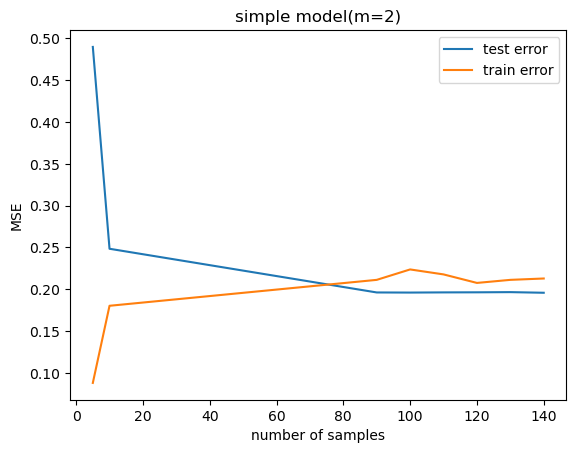

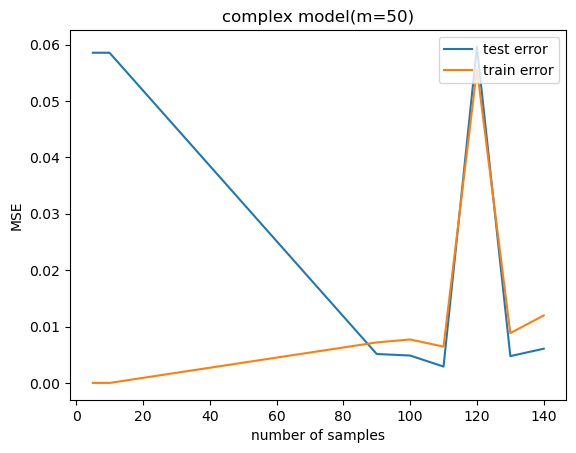

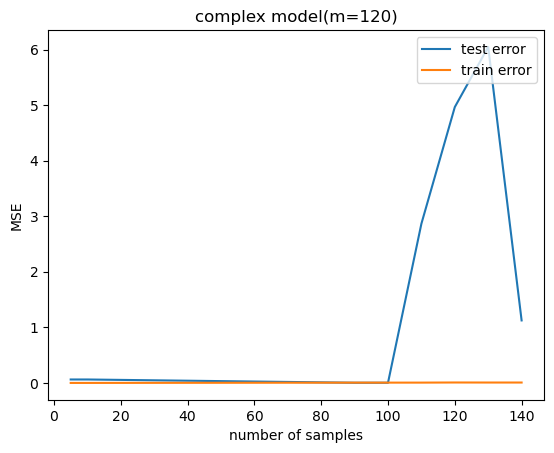

In [154]:
sampleNumbers = [5,10,90,100,110,120,130,140]
def CalcMSE(x1, x2, y1, m):
    X1 = func(x1, m)
    X2 = func(x2, m)
    reg = linear_model.LinearRegression()
    reg.fit(X1, y1)
    Y1 = reg.predict(X1)
    Y2 = reg.predict(X2)
    return mean_squared_error(y1, Y1),mean_squared_error(f(x2), Y2)

#simple model(m=2)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x1Train, x1Test, y1Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x9Train, x9Test, y9Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 2)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 2)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("simple model(m=2)")
plt.show()

#complex model(m=50)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x5Train, x5Test, y5Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x9Train, x9Test, y9Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 50)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 50)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("complex model(m=50)")
plt.show()

#complex model(m=120)
trainError, testError = [],[]

a,b = CalcMSE(x5Train, x5Test, y5Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x5Train, x5Test, y5Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x10Train, x10Test, y10Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x11Train, x11Test, y11Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x12Train, x12Test, y12Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x13Train, x13Test, y13Train, 120)
trainError.append(a)
testError.append(b)

a,b = CalcMSE(x14Train, x14Test, y14Train, 120)
trainError.append(a)
testError.append(b)

plt.plot(sampleNumbers,testError, label="test error")
plt.plot(sampleNumbers,trainError, label="train error")
plt.legend(loc='upper right')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title("complex model(m=120)")
plt.show()

As we can see:<br>
1- in simple model(m=2):
<ul>
    <li>for train set consisting of 5 samples, there is a huge gap between train and test error so we have <strong>over-fitting</strong>. lack of training data cause this.</li>
    <li>for train sets consisting of 10,90,100,110,120,130 and 140 samples, train and test errors are close. but we have a fairly high error. thats because of <strong>under-fitting</strong>.</li>
</ul>
2- in complex model(m=50):
<ul>
<li>for train sets consisting of 5 and 10 samples, train error is 0 so <strong>over-fitting</strong> happened here.</li>
<li>for train sets consisting of 90,100,110,120,130 and 140 samples, train and test errors are close and also we have a fairly low error. we can conclude that m=50 is a good choice for modeling.</li>
    </ul>
3- in complex model(m=120):
<ul>
    <li>train errors for all the training sets are 0, so choosing this model cause <strong>over-fitting</strong>.</li>
</ul>